# Visualizations

## Imports & Reading in Data

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

%matplotlib inline

In [103]:
# read data
df1 = pd.read_csv('Data/Processed/df1.csv') # for initial viz
df2 = pd.read_csv('Data/Processed/df2.csv') # df1 with feature engineering on drug and diagnosis columns

## Exploratory Analysis

### Readmission

As can be seen below, the prevalance of readmission in this dataset is low - likely a reflection of the fact that readmission is costly to care providers.

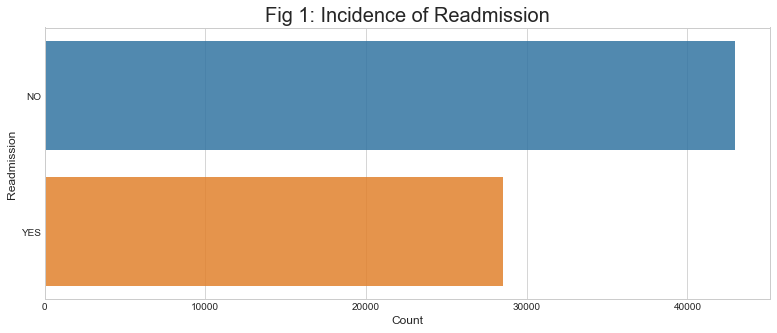

In [104]:
fig, ax = plt.subplots(figsize=(13, 5))

sns.countplot(y='readmitted', data=df1, alpha=0.85)
plt.title('Fig 1: Incidence of Readmission', size=20)
plt.xlabel('Count', size=12)
plt.ylabel('Readmission', size=12)
plt.savefig('Images/Readmission_Incidence.png');

### Incidence of Features (Non-Drug) vs. Readmission

In Figure 2, below, shows the incidence of each non-drug feature, broken down by readmission. 

Unfortunantly, readmission is very low for each feature - no feature stands out that might play a major role in predicting readmission. However, there are a few patterns to note:
- The likelyhood of readmission increases as time in hospital increases.
- The likelyhood of readmission increases with age.
- The likelyhood of readmission increases was the number of medications increases, until the likelyhood starts to decrease. 
- The likelyhood of readmission increases with the number of diagnoses, spiking at 9 diagnoses. 
- The likelyhood of readmission increases with time in hospital. 

Note that the y-axis is the number of observations. 

In [105]:
def print_countplots(fig, columns, hue=df1['readmitted'], tight=[], df=df1, col_pos=0):
    for i, ax in enumerate(fig.axes):
        sns.countplot(x=df[columns[col_pos]], hue=hue, ax=ax, alpha=0.9)
        ax.get_legend().remove()
        ax.set_ylabel('')
        ax.set_xlabel(df[columns[col_pos]].name, size=13)
        ax.tick_params(axis='both', which='major', labelsize=11)

        if df[columns[col_pos]].name == 'diagnosis':
            _ = plt.xticks(rotation=90)
            
        if df[columns[col_pos]].name in tight:
            n=3
            [l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]
            
        if ax == ax0:
            ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        
        col_pos += 1

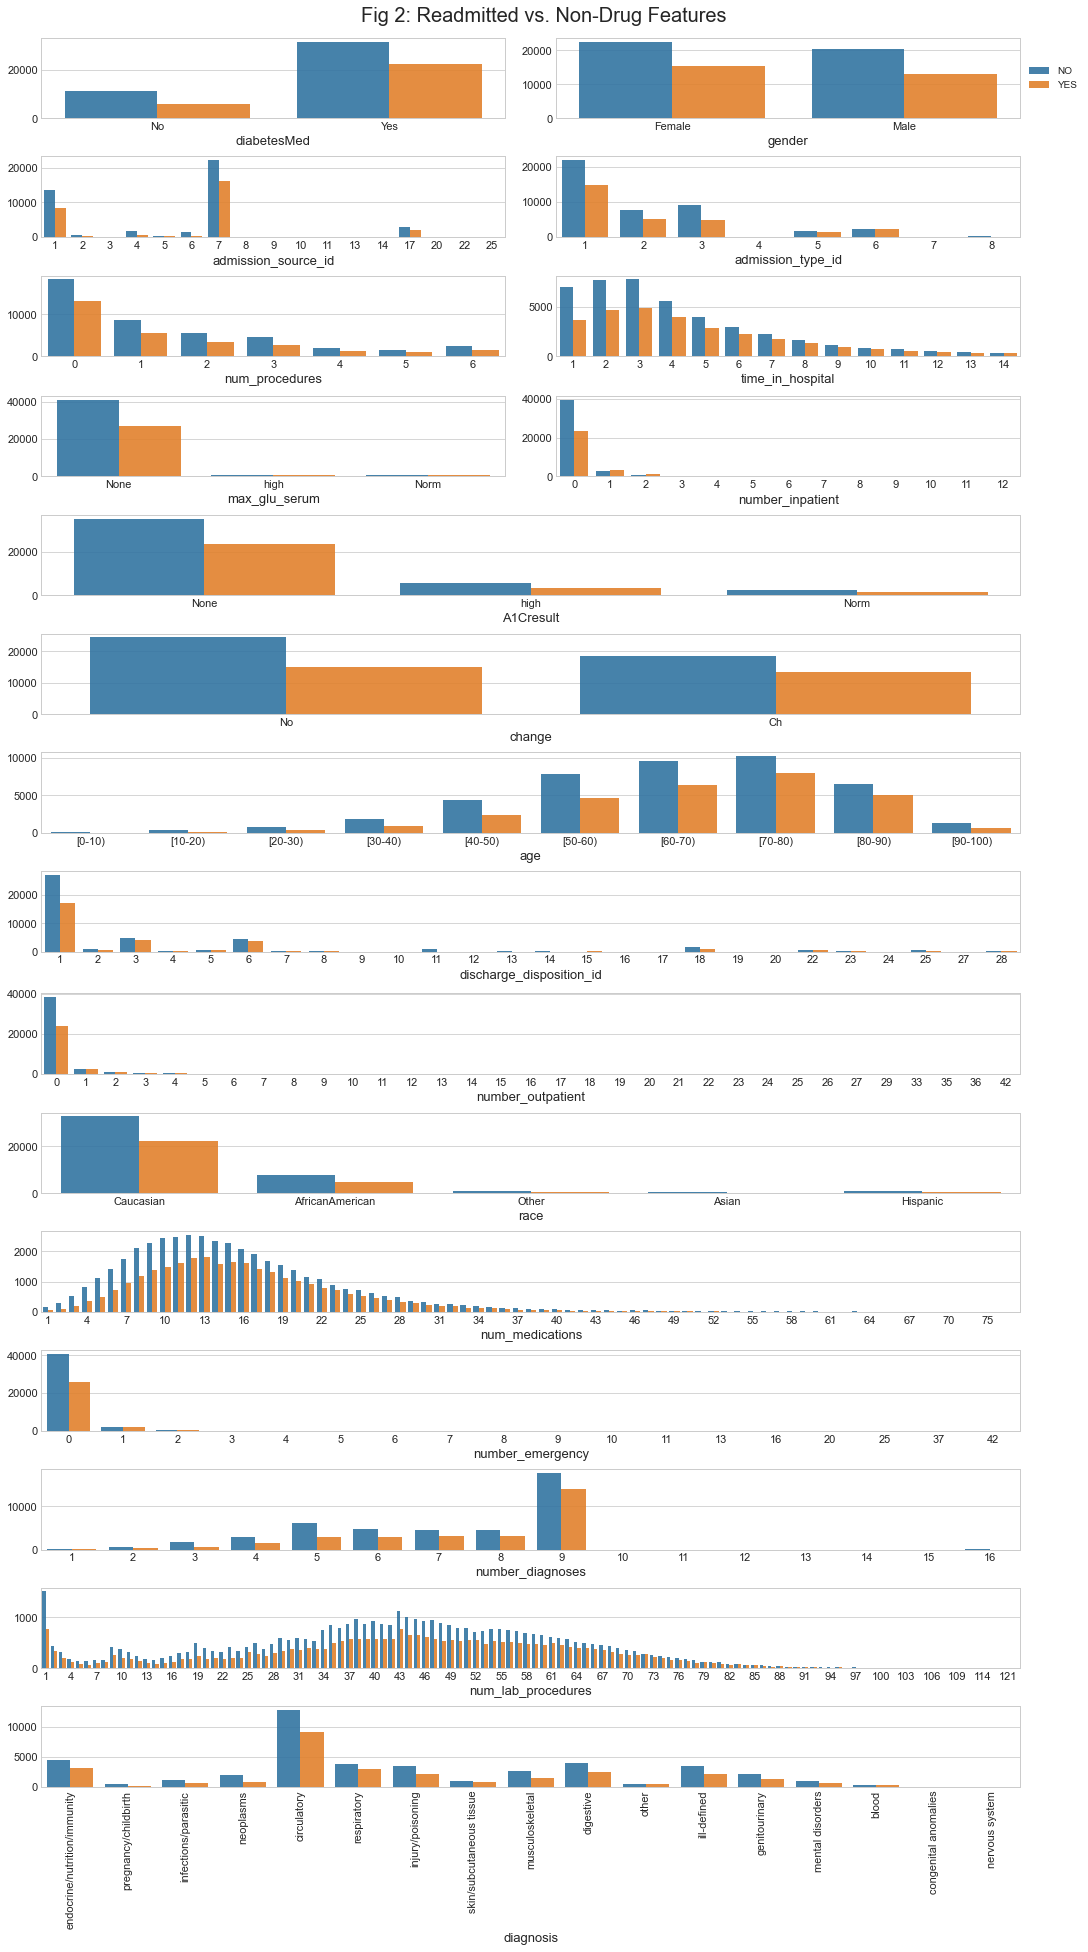

In [106]:
columns = ['gender',
           'diabetesMed',
           'admission_type_id',
           'admission_source_id',
           'time_in_hospital',
           'num_procedures',
           'number_inpatient',
           'max_glu_serum',
           'A1Cresult',
           'change',
           'age',
           'discharge_disposition_id',
           'number_outpatient',
           'race',           
           'num_medications',
           'number_emergency',
           'number_diagnoses',
           'num_lab_procedures',
           'diagnosis']

fig = plt.figure(constrained_layout=True, figsize=(15, 27))
gs = GridSpec(15, 2, figure=fig)

ax0 = fig.add_subplot(gs[0, 1:])
ax0_ = fig.add_subplot(gs[0, :1])
ax1 = fig.add_subplot(gs[1, 1:])
ax1_ = fig.add_subplot(gs[1, :1])
ax2 = fig.add_subplot(gs[2, 1:])
ax2_ = fig.add_subplot(gs[2, :1])
ax3 = fig.add_subplot(gs[3, 1:])
ax3_ = fig.add_subplot(gs[3, :1])
ax4 = fig.add_subplot(gs[4, :])
ax5 = fig.add_subplot(gs[5, :])
ax6 = fig.add_subplot(gs[6, :])
ax7 = fig.add_subplot(gs[7, :])
ax8 = fig.add_subplot(gs[8, :])
ax9 = fig.add_subplot(gs[9, :])
ax10 = fig.add_subplot(gs[10, :])
ax11 = fig.add_subplot(gs[11, :])
ax12 = fig.add_subplot(gs[12, :])
ax13 = fig.add_subplot(gs[13, :])
ax14 = fig.add_subplot(gs[14, :])


print_countplots(fig=fig, columns=columns, tight=['num_medications',
                                                  'num_lab_procedures'])
fig.suptitle("Fig 2: Readmitted vs. Non-Drug Features", size=20)
plt.savefig('Images/Readmission_NonDrug.png');

## Drug Features vs. Readmissions

Figure 3 below shows the same as Figure 2 but for drug features. Unfortnately, no features stand out in its possible ability to explain the variance of readmission.

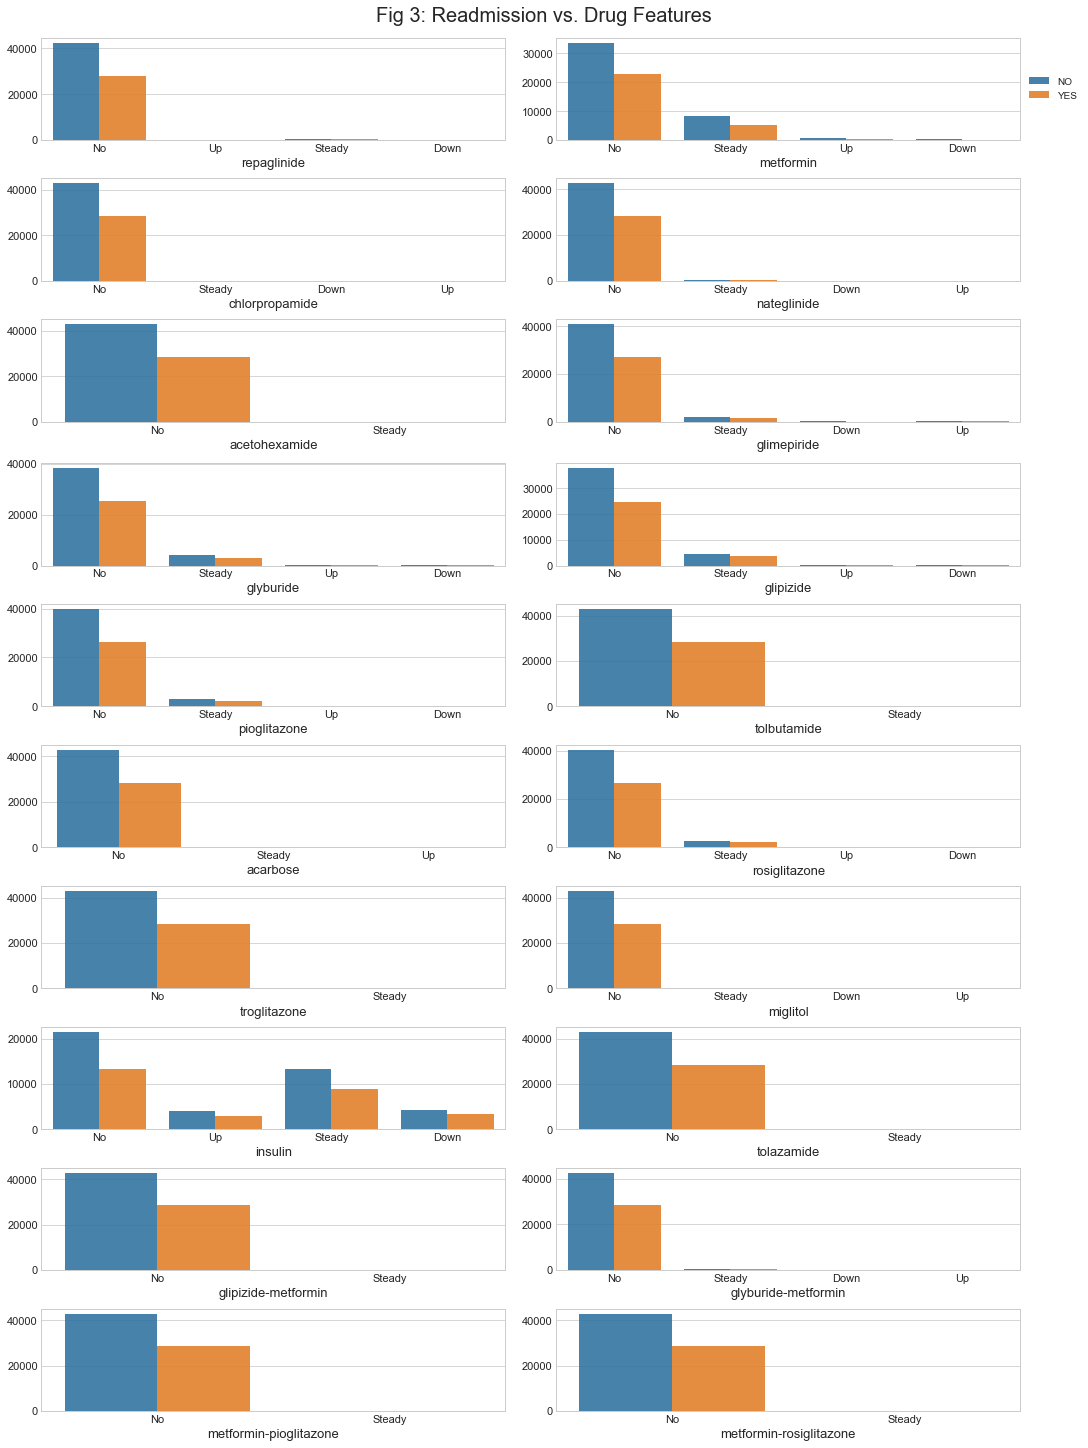

In [107]:
drug_cols = [col for col in df1.columns.drop(['readmitted']) if col not in columns]

fig = plt.figure(constrained_layout=True, figsize=(15, 20))
gs = GridSpec(10, 2, figure=fig)

ax0 = fig.add_subplot(gs[0, 1:])
ax0_ = fig.add_subplot(gs[0, :1])
ax1 = fig.add_subplot(gs[1, 1:])
ax1_ = fig.add_subplot(gs[1, :1])
ax2 = fig.add_subplot(gs[2, 1:])
ax2_ = fig.add_subplot(gs[2, :1])
ax3 = fig.add_subplot(gs[3, 1:])
ax3_ = fig.add_subplot(gs[3, :1])
ax4 = fig.add_subplot(gs[4, 1:])
ax4_ = fig.add_subplot(gs[4, :1])
ax5 = fig.add_subplot(gs[5, 1:])
ax5_ = fig.add_subplot(gs[5, :1])
ax6 = fig.add_subplot(gs[6, 1:])
ax6_ = fig.add_subplot(gs[6, :1])
ax7 = fig.add_subplot(gs[7, 1:])
ax7_ = fig.add_subplot(gs[7, :1])
ax8 = fig.add_subplot(gs[8, 1:])
ax8_ = fig.add_subplot(gs[8, :1])
ax9 = fig.add_subplot(gs[9, 1:])
ax9_ = fig.add_subplot(gs[9, :1])

print_countplots(fig=fig,
                 columns=drug_cols)
fig.suptitle("Fig 3: Readmission vs. Drug Features", size=20)
plt.savefig('Images/Readmission_Drug.png');

# Feature Engineering
## Drug Features

In an effort to reduce dimensionality, changes in prescribed drug dosages are used instead of the drugs themselves. A composite metric, `drug_changes` is created. For each prescribed change in the dosage of a drug, whether it be increased or decreased, this metric increases by 1. Otherwise, it is not increased (i.e., someone with no changes in their prescribed drug dosages would have a `drug_changes` of 0). 

Drug features are then dropped.

The resulting dataset is `df2`.

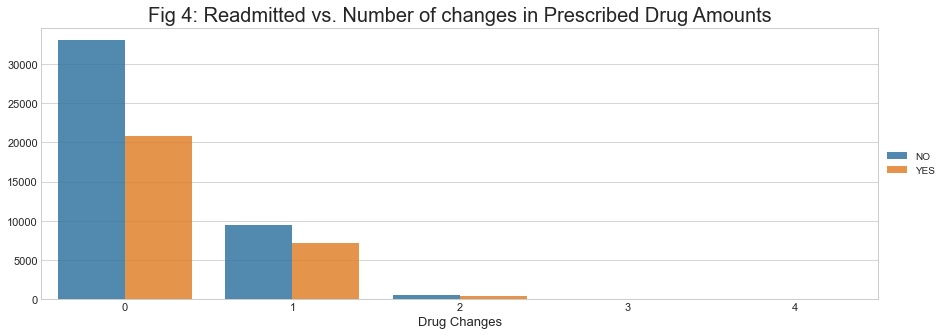

In [108]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(x=df2['drug_changes'], hue=df2['readmitted'], alpha=0.85)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Fig 4: Readmitted vs. Number of changes in Prescribed Drug Amounts', size=20)
ax.set_ylabel('')
ax.set_xlabel('Drug Changes', size=13)
ax.tick_params(axis='both', which='major', labelsize=11)
plt.savefig('Images/Readmission_DrugChanges.png');

## ID Features

As seen in the `codes` dataframe, many of values in `admission_source_id`, `admission_type_id`, and `discharge_disposition_id` are very similair (i.e., `discharge_disposition_id` equal to 11, 19, 20 or 21 all indicated the patient expired). 

Similair values are therefore lumped together based on their definition in `codes`. 

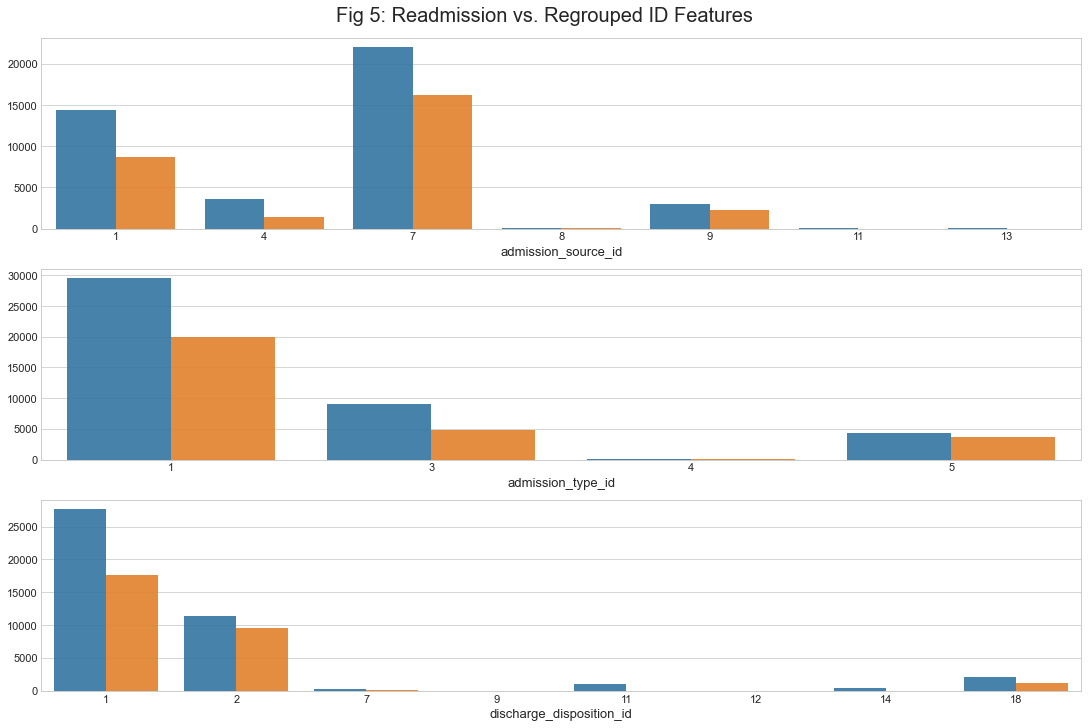

In [109]:
columns = ['admission_source_id', 'admission_type_id', 'discharge_disposition_id']

fig = plt.figure(constrained_layout=True, figsize=(15, 10))
gs = GridSpec(3, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, :])
ax3 = fig.add_subplot(gs[2, :])

print_countplots(fig=fig,
                 columns=columns,
                 hue=df2['readmitted'],
                 df=df2)
fig.suptitle("Fig 5: Readmission vs. Regrouped ID Features", size=20)
plt.savefig('Images/Readmission_ID.png');

## Correlation Matrix

Figure 5 below shows the correlation matrix for a continuous features. Notice that the number of procedures, number of medications, and time in hospital are all positively correlated, as one would expect. 

There is also a slighly positive correlation (0.15) with the number of days the patient was in the hospital the previous year, `number_inpatient`. 

A correlation matrix on the entire one-hot encoded dataset is not shown as it has too meany features and is difficult to ascertain the relationships.

In [110]:
def corr_plot(df, title, figsize=(15, 15), max_cols=20):
    """
    Prints correlation plot. If number of columns > max_cols then annotations are turned off. 
    """
  
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=figsize)
    mask = np.zeros_like(df.corr(), dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    # if too many columns, plot gets messy because of in-box annotations
    if len(df.columns)>max_cols:
        annot = False
    else:
        annot = True   
    
    sns.heatmap(df.corr(),
                annot=annot,
                vmin=-1, vmax=1,
                square=True, 
                cmap=sns.color_palette('RdBu_r', 100),
                mask=mask,
                linewidths=0.5)
    # title
    plt.title(title, size=20)
    
    plt.xticks(size=10)
    plt.yticks(size=10)

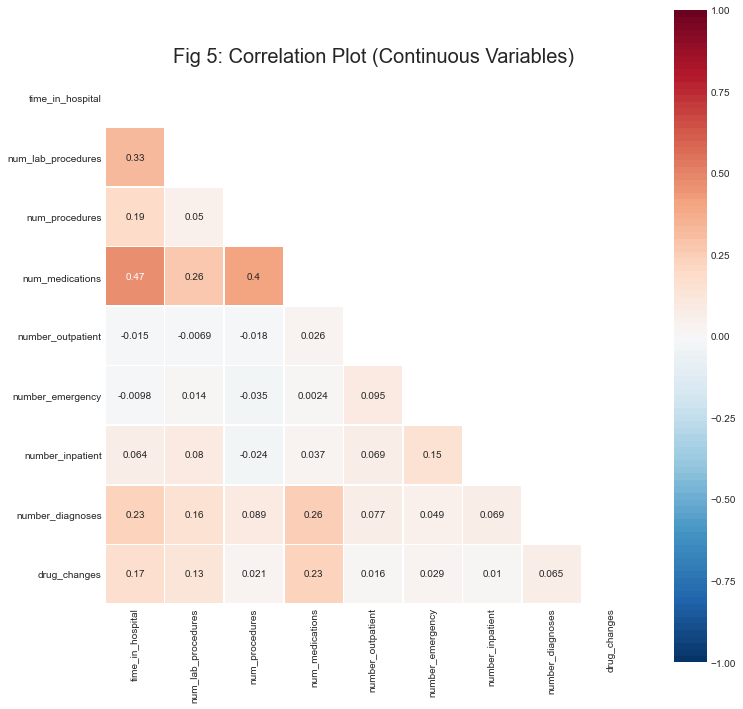

In [111]:
# find categorical and continuous columns
continuous_cols = []
categorical_cols = []
for c in df2.columns:
    if df2[c].dtype=='int64':
        if 'id' not in c:
            continuous_cols.append(c)
        else:
            categorical_cols.append(c)
    else:
        categorical_cols.append(c)

corr_plot(df=df2[continuous_cols],
          figsize=(12, 12),
          title='Fig 5: Correlation Plot (Continuous Variables)')
plt.savefig('Images/CorrelationPlot.png')